<a href="https://colab.research.google.com/github/ProductSingh/Deakin-T2-2024/blob/main/SIT_719_3_1P.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Scikit Learn implementation using cancer dataset

In [1]:
# Importing the neccessary libraries f

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
# Since it is a classification problem, using Random Forest, Logistic regression and Support Vector Machine
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import ConfusionMatrixDisplay

In [2]:
# importing testing dataset for the purpose

from sklearn import datasets

# loading sameple testing dataset to run the commands
cancer= datasets.load_breast_cancer()
# cancer_data =
cancer.data

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [3]:
# Splitting Dataset into Training and Test Set
# defining the test data
X_cancer= cancer.data
# defining the target variable for prediction
y_cancer= cancer.target

In [4]:
# Splitting the data and using a random state to reproduce the results and check accuracy and test size of 0.2 to train model efficiently

from sklearn.model_selection import train_test_split
# Why: To divide the dataset into training and testing sets to evaluate the performance of our model.
X_train, X_test, y_train, y_test = train_test_split(X_cancer,y_cancer, random_state=42)


In [5]:
X_train

array([[1.289e+01, 1.312e+01, 8.189e+01, ..., 5.366e-02, 2.309e-01,
        6.915e-02],
       [1.340e+01, 2.052e+01, 8.864e+01, ..., 2.051e-01, 3.585e-01,
        1.109e-01],
       [1.296e+01, 1.829e+01, 8.418e+01, ..., 6.608e-02, 3.207e-01,
        7.247e-02],
       ...,
       [1.429e+01, 1.682e+01, 9.030e+01, ..., 3.333e-02, 2.458e-01,
        6.120e-02],
       [1.398e+01, 1.962e+01, 9.112e+01, ..., 1.827e-01, 3.179e-01,
        1.055e-01],
       [1.218e+01, 2.052e+01, 7.722e+01, ..., 7.431e-02, 2.694e-01,
        6.878e-02]])

In [6]:
# Preprocessing and Standardization to remove bias around zero
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
# X_train_scaled = X_train
X_test_scaled = scaler.transform(X_test)
# X_test_scaled = X_test

 Training the models using the training data and different classifiers

In [7]:

# Logistic Regression
log_reg = LogisticRegression(max_iter=200,random_state=42)
log_reg.fit(X_train_scaled, y_train)

# Support Vector Classifier
svc = SVC(random_state=42)
svc.fit(X_train_scaled, y_train)

# Random Forest classifer
clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train_scaled, y_train)


RandomForestClassifier(random_state=42)

In [8]:
from sklearn.model_selection import cross_val_score
# Why: Cross-validation is used to assess the model's performance more robustly by partitioning the original dataset into k equal sized subsamples and using one subsample as the validation set and the others as the training set. This process is repeated k times.
cv_scores = cross_val_score(clf, cancer.data, cancer.target, cv=5)
print(f"Cross-validation scores: {cv_scores}")


Cross-validation scores: [0.92105263 0.93859649 0.98245614 0.96491228 0.97345133]


In [9]:
from sklearn.model_selection import GridSearchCV
# Why: To find the best hyperparameters for the model, improving performance on unseen data. GridSearchCV searches across a range of hyperparameters and evaluates the performance of each combination using cross-validation.
param_grid = {'n_estimators': [100, 200, 300], 'max_depth': [5, 10, 15]}
grid_search = GridSearchCV(clf, param_grid, cv=5)
grid_search.fit(cancer.data, cancer.target)
print(f"Best parameters: {grid_search.best_params_}")


Best parameters: {'max_depth': 10, 'n_estimators': 300}


In [10]:

# Predictions from each model
y_pred_log_reg = log_reg.predict(X_test_scaled)
y_pred_svc = svc.predict(X_test_scaled)
y_pred_clf = clf.predict(X_test_scaled)

# Confusion matrices
cm_log_reg = confusion_matrix(y_test, y_pred_log_reg)
cm_svc = confusion_matrix(y_test, y_pred_svc)
cm_clf = confusion_matrix(y_test, y_pred_clf)

In [11]:
# Function to calculate accuracy from confusion matrix
def calculate_accuracy(cm):
    return np.trace(cm) / np.sum(cm)

accuracy_log_reg = calculate_accuracy(cm_log_reg)
accuracy_svc = calculate_accuracy(cm_svc)
accuracy_clf = calculate_accuracy(cm_clf)


In [12]:
# Create a DataFrame with the results
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'Support Vector Classifier', 'Random Forest'],
    'Accuracy': [accuracy_log_reg, accuracy_svc, accuracy_clf],
    'TP': [cm_log_reg[1, 1], cm_svc[1, 1], cm_clf[1, 1]],
    'TN': [cm_log_reg[0, 0], cm_svc[0, 0], cm_clf[0, 0]],
    'FP': [cm_log_reg[0, 1], cm_svc[0, 1], cm_clf[0, 1]],
    'FN': [cm_log_reg[1, 0], cm_svc[1, 0], cm_clf[1, 0]]
})

# Display the DataFrame
results

,Model,Accuracy,TP,TN,FP,FN
0,Logistic Regression,0.979021,87,53,1,2
1,Support Vector Classifier,0.972028,87,52,2,2
2,Random Forest,0.965035,87,51,3,2


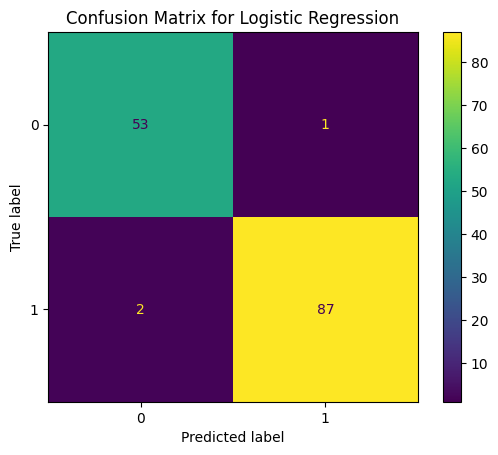

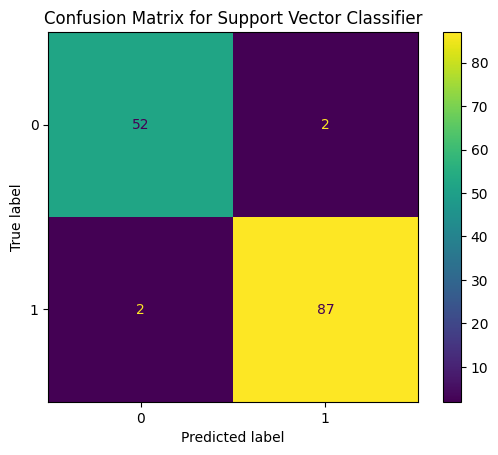

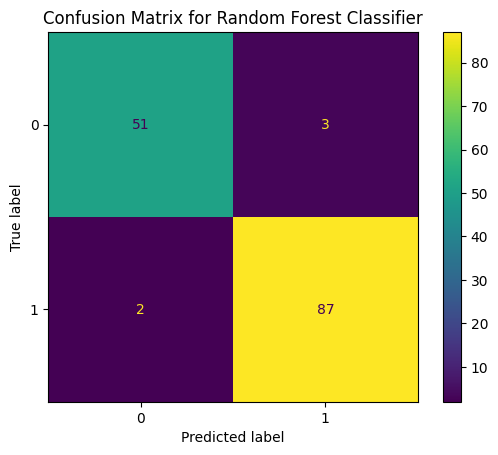

In [13]:
# Function to plot confusion matrix for a given model and its predictions
def plot_confusion_matrix(y_true, y_pred, model_name):
    cm = confusion_matrix(y_true, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot()
    plt.title(f'Confusion Matrix for {model_name}')
    plt.show()

# Plot confusion matrix for each model
plot_confusion_matrix(y_test, y_pred_log_reg, 'Logistic Regression')
plot_confusion_matrix(y_test, y_pred_svc, 'Support Vector Classifier')
plot_confusion_matrix(y_test, y_pred_clf, 'Random Forest Classifier')